In [1]:
#import necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load data
data = pd.read_csv(r"C:\Users\Shay\Downloads\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#check for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#check for duplicates
data.duplicated().sum()
#drop duplicates
data.drop_duplicates(inplace = True)

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

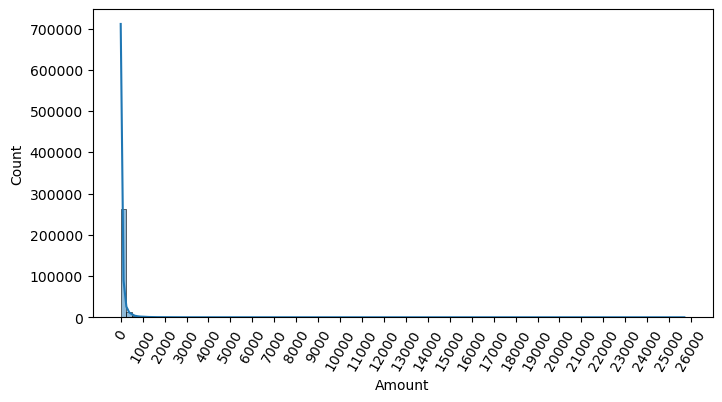

In [7]:
#histogram of Amount
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(data['Amount'], bins=100, kde=True)
plt.show()

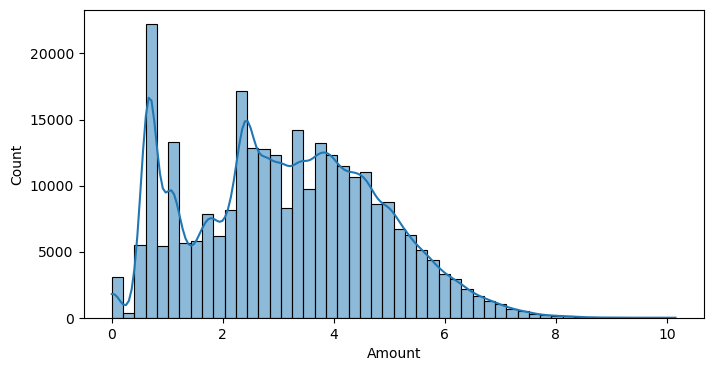

In [8]:
#histogram of transformed column
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(data['Amount']), bins=50, kde=True)
plt.show()

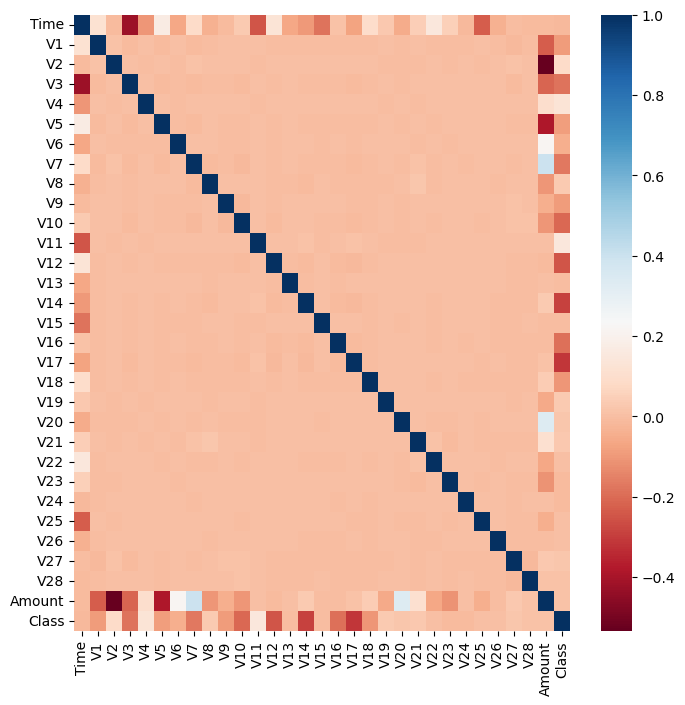

In [9]:
#correlation
plt.figure(figsize=(8, 8))
corr = data.corr()
sns.heatmap(corr, cmap='RdBu')
plt.show()

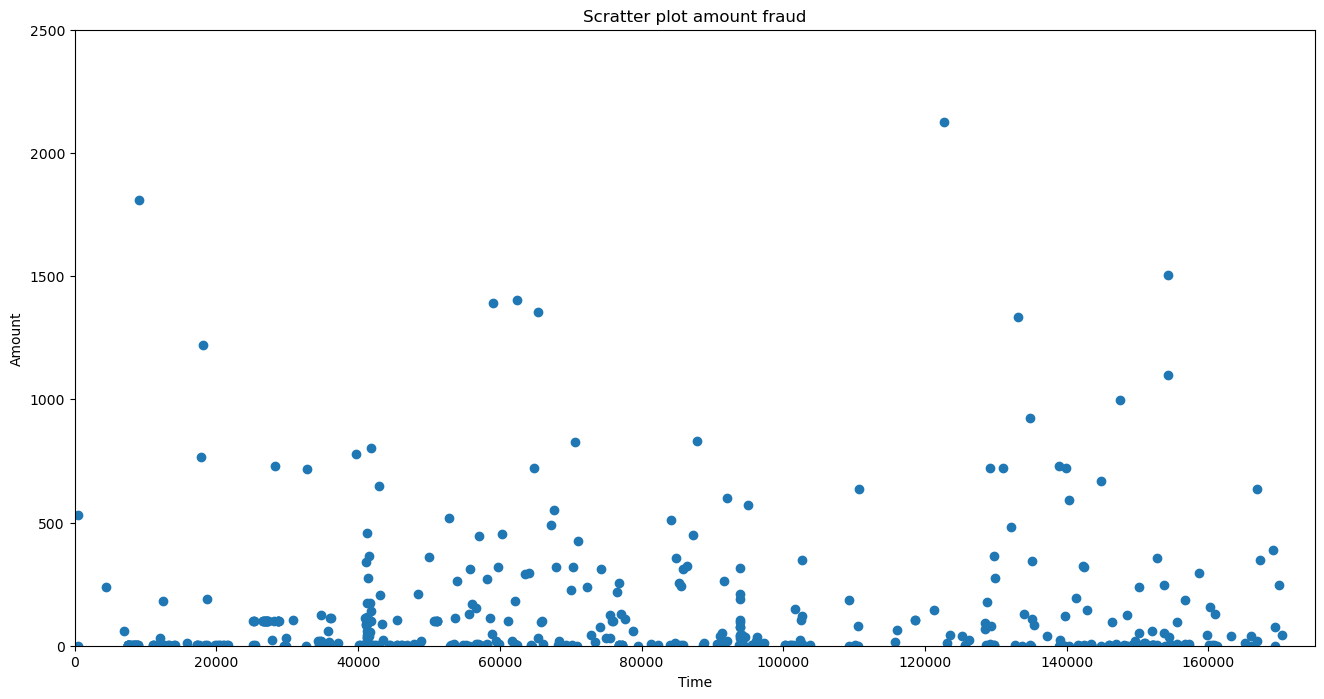

In [10]:
data_fraud = data[data['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(16,8))
plt.scatter(data_fraud['Time'], data_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [11]:
#data splitting
X = data.drop('Class', axis=1)
y = data['Class']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print({"X_train_scaled_shape": X_train_scaled.shape, "X_test_scaled_shape": X_test_scaled.shape})

{'X_train_scaled_shape': (226980, 30), 'X_test_scaled_shape': (56746, 30)}


In [14]:
#Loading model
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier()
}

In [15]:
#fitting model
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

threshold = 0.5  
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_binary)

    if hasattr(model, "decision_function"):
        y_pred_scores = model.decision_function(X_test_scaled)
        y_pred_proba = (y_pred_scores - y_pred_scores.min()) / (y_pred_scores.max() - y_pred_scores.min())
    else:
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    y_pred = (y_pred_proba >= threshold).astype(int)
    cm = confusion_matrix(y_test_binary, y_pred)
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
    pr_auc = auc(recall, precision)

    results[name] = {'confusion_matrix': cm, 'precision_recall_auc': pr_auc}

print(results)


{'Logistic Regression': {'confusion_matrix': array([[56607,    49],
       [   19,    71]], dtype=int64), 'precision_recall_auc': 0.7046971489333079}, 'Random Forest': {'confusion_matrix': array([[56654,     2],
       [   24,    66]], dtype=int64), 'precision_recall_auc': 0.8196959201256534}, 'Gradient Boosting': {'confusion_matrix': array([[    1, 56655],
       [    5,    85]], dtype=int64), 'precision_recall_auc': 0.6721933982649364}, 'Support Vector Machine': {'confusion_matrix': array([[56655,     1],
       [   41,    49]], dtype=int64), 'precision_recall_auc': 0.7799118476140795}, 'Neural Network': {'confusion_matrix': array([[56647,     9],
       [   29,    61]], dtype=int64), 'precision_recall_auc': 0.7711362340691175}}


In [16]:
#confusion metrics
for name, result in results.items():
    print(name)
    print("AUPRC:", result['precision_recall_auc'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print()

Logistic Regression
AUPRC: 0.7046971489333079
Confusion Matrix:
[[56607    49]
 [   19    71]]

Random Forest
AUPRC: 0.8196959201256534
Confusion Matrix:
[[56654     2]
 [   24    66]]

Gradient Boosting
AUPRC: 0.6721933982649364
Confusion Matrix:
[[    1 56655]
 [    5    85]]

Support Vector Machine
AUPRC: 0.7799118476140795
Confusion Matrix:
[[56655     1]
 [   41    49]]

Neural Network
AUPRC: 0.7711362340691175
Confusion Matrix:
[[56647     9]
 [   29    61]]



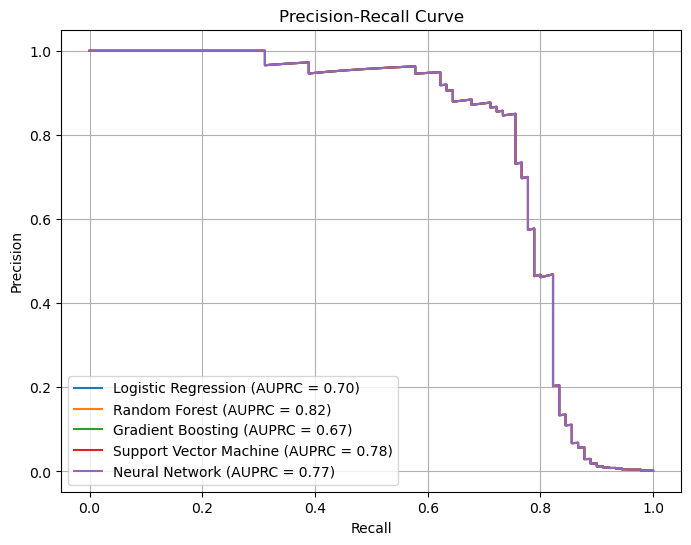

In [17]:
#recall cuirve
plt.figure(figsize=(8, 6))

for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f"{name} (AUPRC = {result['precision_recall_auc']:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#accuracy score
from sklearn.metrics import accuracy_score

accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.9992
Random Forest: 0.9995
Gradient Boosting: 0.9993
Support Vector Machine: 0.9994
Neural Network: 0.9993
